In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 5.2 MB/s 


In [ ]:
df = pd.read_csv('/content/CKD.csv')

In [ ]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.000000,80.0,1.020,1,0,normal,normal,notpresent,notpresent,121.000000,...,44.00,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.000000,50.0,1.020,4,0,normal,normal,notpresent,notpresent,146.523364,...,38.00,6000.0,4.673077,no,no,no,good,no,no,ckd
2,62.000000,80.0,1.010,2,3,normal,normal,notpresent,notpresent,423.000000,...,31.00,7500.0,4.673077,no,yes,no,poor,no,yes,ckd
3,48.000000,70.0,1.005,4,0,normal,abnormal,present,notpresent,117.000000,...,32.00,6700.0,3.900000,yes,no,no,poor,no,yes,ckd
4,52.047753,80.0,1.020,0,0,normal,normal,notpresent,notpresent,106.000000,...,35.00,7300.0,4.600000,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.000000,80.0,1.020,0,0,normal,normal,notpresent,notpresent,140.000000,...,47.00,6700.0,4.673077,no,no,no,good,no,no,notckd
396,42.000000,70.0,1.025,0,0,normal,normal,notpresent,notpresent,75.000000,...,54.00,7800.0,4.673077,no,no,no,good,no,no,notckd
397,12.000000,80.0,1.020,0,0,normal,normal,notpresent,notpresent,100.000000,...,39.25,6600.0,5.400000,no,no,no,good,no,no,notckd
398,17.000000,60.0,1.025,0,0,normal,normal,notpresent,notpresent,114.000000,...,51.00,7200.0,5.900000,no,no,no,good,no,no,notckd


In [ ]:
df.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [ ]:
lenco = LabelEncoder()

In [ ]:
df['rbc'] = lenco.fit_transform(df['rbc'])

In [ ]:
df['pc'] = lenco.fit_transform(df['pc'])

In [ ]:
df['pcc'] = lenco.fit_transform(df['pcc'])

In [ ]:
df['ba'] = lenco.fit_transform(df['ba'])

In [ ]:
df['htn'] = lenco.fit_transform(df['htn'])

In [ ]:
df['dm'] = lenco.fit_transform(df['dm'])

In [ ]:
df['cad'] = lenco.fit_transform(df['cad'])

In [ ]:
df['pe'] = lenco.fit_transform(df['pe'])

In [ ]:
df['ane'] = lenco.fit_transform(df['ane'])

In [ ]:
df['appet'] = lenco.fit_transform(df['appet'])

In [ ]:
df['class'] = lenco.fit_transform(df['class'])

In [ ]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.000000,80.0,1.020,1,0,1,1,0,0,121.000000,...,44.00,7800.0,5.200000,1,1,0,0,0,0,0
1,7.000000,50.0,1.020,4,0,1,1,0,0,146.523364,...,38.00,6000.0,4.673077,0,0,0,0,0,0,0
2,62.000000,80.0,1.010,2,3,1,1,0,0,423.000000,...,31.00,7500.0,4.673077,0,1,0,1,0,1,0
3,48.000000,70.0,1.005,4,0,1,0,1,0,117.000000,...,32.00,6700.0,3.900000,1,0,0,1,0,1,0
4,52.047753,80.0,1.020,0,0,1,1,0,0,106.000000,...,35.00,7300.0,4.600000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.000000,80.0,1.020,0,0,1,1,0,0,140.000000,...,47.00,6700.0,4.673077,0,0,0,0,0,0,1
396,42.000000,70.0,1.025,0,0,1,1,0,0,75.000000,...,54.00,7800.0,4.673077,0,0,0,0,0,0,1
397,12.000000,80.0,1.020,0,0,1,1,0,0,100.000000,...,39.25,6600.0,5.400000,0,0,0,0,0,0,1
398,17.000000,60.0,1.025,0,0,1,1,0,0,114.000000,...,51.00,7200.0,5.900000,0,0,0,0,0,0,1


In [ ]:
x = df.drop('class', axis = 1)
y = df[['class']]

In [ ]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import shap
shap.initjs()

**Split Dataset**

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state = 23)

**RF**

In [ ]:
rfc = RandomForestClassifier(n_estimators = 50, max_depth= 4)

In [ ]:
rfc.fit(xtrain, ytrain)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(max_depth=4, n_estimators=50)

In [ ]:
pred_test = rfc.predict(xtest)
accuracy_score(ytest, pred_test)

0.9916666666666667

In [ ]:
f1_score(ytest, pred_test)

0.989247311827957

In [ ]:
cm = confusion_matrix(ytest, pred_test)
print('Confusion Matrix : \n', cm)

Confusion Matrix : 
 [[73  1]
 [ 0 46]]


In [ ]:
sensetivity = cm[0,0] / (cm[0,0] + cm[0,1])
print("Sensetivity: ", sensetivity)

Sensetivity:  0.9864864864864865


In [ ]:
precision = cm[0,0] / (cm[0,0] + cm[1,0])
print("Precision: ", precision)

Precision:  1.0


In [ ]:
specificity = cm[1,1] / (cm[1,1] + cm[1,0])
print("Specificity: ", specificity)

Specificity:  1.0


In [ ]:
cohen_kappa_score(ytest, pred_test)

0.9824458747805734

*Shap value*

In [ ]:
explainer = shap.Explainer(rfc.predict, xtest)
rfc_shap_values = explainer(xtest)

Permutation explainer: 121it [00:49,  1.94it/s]


**Gradint Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier(n_estimators = 25,learning_rate = 0.1)

In [ ]:
gbc.fit(xtrain, ytrain)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


GradientBoostingClassifier(n_estimators=25)

In [ ]:
pred_train = gbc.predict(xtrain)

In [ ]:
accuracy_score(ytrain, pred_train)

0.9928571428571429

In [ ]:
pred_test = gbc.predict(xtest)

In [ ]:
accuracy_score(ytest, pred_test)

0.9416666666666667

In [ ]:
cm = confusion_matrix(ytest, pred_test)
print('Confusion Matrix : \n', cm)

Confusion Matrix : 
 [[71  3]
 [ 4 42]]


In [ ]:
f1_score(ytest, pred_test)

0.9230769230769231

In [ ]:
sensetivity = cm[0,0] / (cm[0,0] + cm[0,1])
print("Sensetivity: ", sensetivity)

Sensetivity:  0.9594594594594594


In [ ]:
precision = cm[0,0] / (cm[0,0] + cm[1,0])
print("Precision: ", precision)

Precision:  0.9466666666666667


In [ ]:
specificity = cm[1,1] / (cm[1,1] + cm[1,0])
print("Specificity: ", specificity)

Specificity:  0.9130434782608695


In [ ]:
cohen_kappa_score(ytest, pred_test)

0.8761061946902655

*Shap Value*

In [ ]:
explainer = shap.Explainer(gbc.predict, xtest)
gbc_shap_values = explainer(xtest)

**XGBoost**

In [ ]:
from xgboost import XGBClassifier
xgc = XGBClassifier(base_score = 0.5, use_label_encoder = False, learning_rate = 0.1)

In [ ]:
xgc.fit(xtrain, ytrain)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


XGBClassifier(use_label_encoder=False)

In [ ]:
pred_train = xgc.predict(xtrain)
accuracy_score(ytrain, pred_train)

1.0

In [ ]:
pred_test = xgc.predict(xtest)
accuracy_score(ytest, pred_test)

0.975

In [ ]:
f1_score(ytest, pred_test)

0.967032967032967

In [ ]:
cm = confusion_matrix(ytest, pred_test)
print('Confusion Matrix : \n', cm)

Confusion Matrix : 
 [[73  1]
 [ 2 44]]


In [ ]:
sensetivity = cm[0,0] / (cm[0,0] + cm[0,1])
print("Sensetivity: ", sensetivity)

Sensetivity:  0.9864864864864865


In [ ]:
precision = cm[0,0] / (cm[0,0] + cm[1,0])
print("Precision: ", precision)

Precision:  0.9733333333333334


In [ ]:
specificity = cm[1,1] / (cm[1,1] + cm[1,0])
print("Specificity: ", specificity)

Specificity:  0.9565217391304348


In [ ]:
cohen_kappa_score(ytest, pred_test)

0.9469026548672567

*Shap Value*

In [ ]:
explainer = shap.Explainer(xgc.predict, xtest)
xgc_shap_values = explainer(xtest)

Permutation explainer: 121it [00:12,  2.10it/s]


**LGBM**

In [ ]:
import lightgbm as lgb

In [ ]:
model = lgb.LGBMClassifier(learning_rate = 0.09,max_depth = 5,random_state = 75)

In [ ]:
model.fit(xtrain,ytrain,eval_set = [(xtest,ytest),(xtrain,ytrain)], verbose= 45,eval_metric='logloss')

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[45]	training's binary_logloss: 0.0256925	training's binary_logloss: 0.0256925	valid_0's binary_logloss: 0.0558778	valid_0's binary_logloss: 0.0558778
[90]	training's binary_logloss: 0.00207507	training's binary_logloss: 0.00207507	valid_0's binary_logloss: 0.0425462	valid_0's binary_logloss: 0.0425462


LGBMClassifier(learning_rate=0.09, max_depth=5, random_state=75)

In [ ]:
pred_train = model.predict(xtrain)
accuracy_score(ytrain, pred_train)

1.0

In [ ]:
pred_test = model.predict(xtest)
accuracy_score(ytest, pred_test)

0.9916666666666667

In [ ]:
f1_score(ytest, pred_test)

0.989247311827957

In [ ]:
cm = confusion_matrix(ytest, pred_test)
print('Confusion Matrix : \n', cm)

Confusion Matrix : 
 [[73  1]
 [ 0 46]]


In [ ]:
sensetivity = cm[0,0] / (cm[0,0] + cm[0,1])
print("Sensetivity: ", sensetivity)

Sensetivity:  0.9864864864864865


In [ ]:
precision = cm[0,0] / (cm[0,0] + cm[1,0])
print("Precision: ", precision)

Precision:  1.0


In [ ]:
specificity = cm[1,1] / (cm[1,1] + cm[1,0])
print("Specificity: ", specificity)

Specificity:  1.0


In [ ]:
cohen_kappa_score(ytest, pred_test)

0.9824458747805734

*Shap Value*

In [ ]:
explainer = shap.Explainer(model.predict, xtest)
lgbm_shap_values = explainer(xtest)

Permutation explainer: 121it [00:21,  2.99it/s]


***Figure Of Shapely Value***

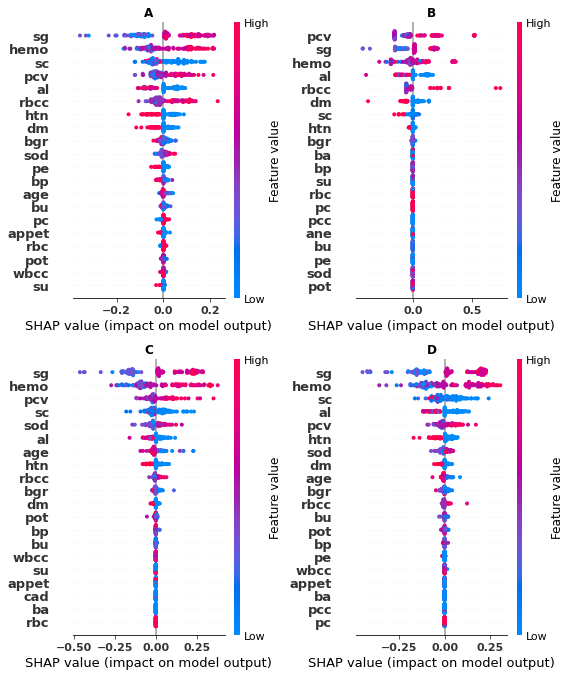

In [ ]:
fig = plt.figure(figsize=(7,7))

plt.subplot(2, 2, 1)
plt.title('A', weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
shap.summary_plot(rfc_shap_values, show = False)

plt.subplot(2, 2, 2)
plt.title('B', weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
shap.summary_plot(gbc_shap_values, show = False)

plt.subplot(2, 2, 3)
plt.title('C', weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
shap.summary_plot(xgc_shap_values, show = False)

plt.subplot(2, 2, 4)
plt.title('D', weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
shap.summary_plot(lgbm_shap_values, show = False)

plt.tight_layout()
plt.savefig('Shap Summary Plot.png', dpi=1200)
plt.savefig('Shap Summary Plot.pdf', dpi=1200)